# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

***(1)***
    Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
rdf = pd.read_csv('ab_data.csv')

**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
n_enteres = rdf.shape[0]
n_enteres

294478

**c.** The number of unique users in the dataset.

In [4]:
unique=len(rdf['user_id'].unique())
unique

290584

**d.** The proportion of users converted.

In [5]:
rdf.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
rdf.query('landing_page == "new_page" & group == "control"').shape[0] + rdf.query('landing_page == "old_page" & group == "treatment"').shape[0]


3893

**f.** Do any of the rows have missing values?

In [7]:
rdf.isna().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

***(2)***
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = rdf[((rdf['group'] == 'treatment') == True) == ((rdf['landing_page'] == 'new_page'))]

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

***(3)*** 
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df2[df2['user_id'].duplicated()== True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop_duplicates() 
# Check again if the row with a duplicate user_id is deleted or not
df2.duplicated().sum()

0

***(4)***
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>





In [14]:
(df2.converted == 1).mean()

0.11959667567149027

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2[df2['group'] == 'control'].converted.mean()

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2[df2['group'] == 'treatment'].converted.mean()

0.11880724790277405

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.

**d.** What is the probability that an individual received the new page?

In [18]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2.index)

0.5000636646764286

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**The results do not support the notion that the new page will increase conversions, as the probability of an individual converting in the control group is 12.04%, and the probability of conversion in the treatment group is only slightly lower at 11.88%. Additionally, the control group has a slightly higher conversion rate, so it's unlikely that the new page will result in more conversions.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


***(2.1)***
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**p-value = $p_{new}$ - $p_{old}$ <br><br>
**$H_{0}$:  $p_{new}$ - $p_{old}$ <= 0**<br>
**$H_{1}$: $p_{new}$ - $p_{old}$ > 0****

***(2.2)*** - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
p_new = ((df2[df2['converted'] == 1].shape[0]) / (df2.shape[0]))
p_new

0.11959667567149027

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_old = ((df2[df2['converted'] == 1].shape[0]) / (df2.shape[0]))
p_old

0.11959667567149027

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [21]:
n_new = df2['landing_page'].value_counts()[0]
n_new

145311

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2['landing_page'].value_counts()[1]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size= n_new, p= [(1-p_new), p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
p_new_new = (len(new_page_converted[new_page_converted==1]) / len(new_page_converted))
p_old_old = (len(old_page_converted[old_page_converted==1]) / len(old_page_converted))

p_diffs = p_new_new - p_old_old


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution 
p_diffs = np.array([])

for _ in range(10000):
    new_page_converted = np.random.choice(2, size= n_new, p= [(1-p_new), p_new])
    old_page_converted = np.random.choice(2, size= n_old, p= [(1-p_old), p_old])

    p_new_new = (len(new_page_converted[new_page_converted==1]) / len(new_page_converted))
    p_old_old = (len(old_page_converted[old_page_converted==1]) / len(old_page_converted))
    
    p_diffs = np.append(p_diffs, (p_new_new - p_old_old))

p_diffs

array([-0.00018186, -0.00035391,  0.00257125, ..., -0.00098733,
        0.00041007, -0.00068413])

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



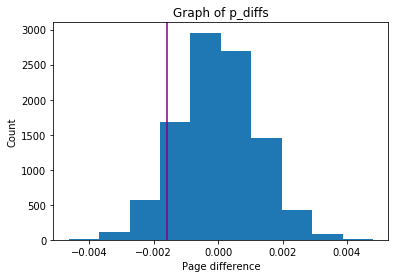

In [27]:
obs = df2[df2['group'] == 'treatment'].converted.mean()  - df2[df2['group'] == 'control'].converted.mean() 
plt.hist(p_diffs)
plt.title('Graph of p_diffs')#title of graphs
plt.xlabel('Page difference') # x-label of graphs
plt.ylabel('Count') # y-label of graphs
plt.axvline(x=obs,c='purple');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
(p_diffs > obs).mean()

0.90239999999999998

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

**As we can see, the p-value for the difference between the new and old pages of the simulated data was above 90% in part J, which indicates that the value is very large and suggests a possibility of being close to the null hypothesis, which is that there is no difference between the new and old pages, and in fact this is what occurred. I am unable to reject the null hypothesis because 0.9089 is so far from the error rate of 0.05.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page=="old_page" and converted==1').count()[0]

# number of conversions with the new_page
convert_new = df2.query('landing_page=="new_page" and converted==1').count()[0]

# number of individuals who were shown the old_page
n_old = df2.query('landing_page=="old_page"').count()[0]

# number of individuals who received new_page
n_new = n_new = df2.query('landing_page=="new_page"').count()[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.


In [30]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31160753391 0.905173705141


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



The z-score represents the test statistic, indicating that the observed value is 1.311 standard deviations away from the population parameter. As the p-value in the z-test is similar to that of part j, we would maintain the same conclusion as in part k.

<a id='regression'></a>
### Part III - A regression approach

***(3)***
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic Regression.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [31]:
df2['intercept'] = 1
df2['ab_pag'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_pag
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [32]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_pag']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-14 15:23 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_pag       -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


**The p-value in this scenario demonstrates the significance of the AB page and its deviation from the null hypothesis. Despite the value being 0.1897, which is greater than the 0.05 error value, we cannot reject the null hypothesis, implying that the AB page has no impact on page conversion. Unlike the previous evaluation in part II, this analysis involves a two-sided relationship between the pages, which places them on an equal footing.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Expanding the regression model by adding additional features can improve the predictive power of the model and provide further insight into the relationship between these features and the response variable.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [34]:
# Read the countries.csv
cnt_df = pd.read_csv('countries.csv')
cnt_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
# Join with the df2 dataframe
df2_new = df2.set_index('user_id').join(cnt_df.set_index('user_id'))
df2_new.head()

,timestamp,group,landing_page,converted,intercept,ab_pag,country
user_id,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US


In [36]:
# Create the necessary dummy variables
df2_new[['US','CA']] = pd.get_dummies(df2_new.country)[['US','CA']]
df2_new.head()

,timestamp,group,landing_page,converted,intercept,ab_pag,country,US,CA
user_id,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,1,0
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,1,0
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,1,0
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,1,0
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,1,0


In [37]:
lm2 = sm.Logit(df2_new.converted , df2_new[['intercept','US','CA','ab_pag']])
result2 = lm2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-14 15:23 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4143  0.0000  -2.0043  -1.9544
US           -0.0099    0.0133    -0.7437  0.4570  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
ab_pag       -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
==================================================================

"""

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 




In [38]:
# Fit your model, and summarize the results
df2_new.loc[(df2_new['US'] == 1 ) & (df2_new['ab_pag'] == 1), 'US_ab_pag'] = 1
df2_new.loc[(df2_new['US'] != 1 ) | (df2_new['ab_pag'] != 1), 'US_ab_pag'] = 0
df2_new.loc[(df2_new['CA'] == 1 ) & (df2_new['ab_pag'] == 1), 'CA_ab_pag'] = 1
df2_new.loc[(df2_new['CA'] != 1 ) | (df2_new['ab_pag'] != 1), 'CA_ab_pag'] = 0

df2_new.head()

,timestamp,group,landing_page,converted,intercept,ab_pag,country,US,CA,US_ab_pag,CA_ab_pag
user_id,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,1,0,1.0,0.0
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,1,0,1.0,0.0
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,1,0,0.0,0.0
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,1,0,1.0,0.0
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,1,0,1.0,0.0


In [39]:
lm3 = sm.Logit(df2_new.converted , df2_new[['intercept','US','CA','ab_pag','US_ab_pag','CA_ab_pag']])
result3 = lm3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-14 15:23 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
ab_pag        0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
US_ab_pag    -0.0314    0.0266    -1.1811  0.2375  -0.0835   0.0207
CA_ab_pag    -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

>**The goal of this project was to help a company determine whether to switch to a new page or stick with the old one. After conducting several tests, we consistently arrived at the same conclusion that there is no evidence to support moving to the new page. Therefore, it is recommended to stick with the old page.**

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0